# Dependencies 
apt-get install libgl1-mesa-glx libglib2.0-0
pip install PyQt5
pip install matplotlib


In [ ]:
%pip install PyQt5
%pip install matplotlib


In [ ]:
from PyQt5.QtWidgets import QApplication, QWidget
print("PyQt5 is working!")


In [ ]:
%gui qt
# Your PyQt5 code here


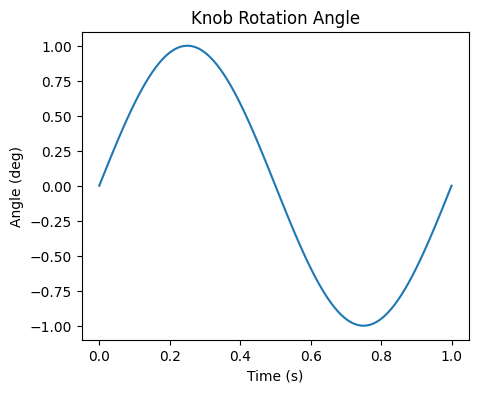

In [5]:
import tkinter as tk
from tkinter import ttk, filedialog
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import numpy as np

class MotoTaskApp:
    def __init__(self, root):
        self.root = root
        self.root.title("MotoPya")

        # Main Panels
        self.main_panel = ttk.Frame(root)
        self.main_panel.grid(row=0, column=0, padx=10, pady=10)

        self.left_panel = ttk.Frame(self.main_panel)
        self.left_panel.grid(row=0, column=0, padx=10, pady=10, sticky="n")

        self.right_panel = ttk.Frame(self.main_panel)
        self.right_panel.grid(row=0, column=1, padx=10, pady=10, sticky="n")

        # Create Components
        self.create_left_panel()
        self.create_right_panel()

    def create_left_panel(self):
        # Section 1: MotoTrak Connection and Subject Settings
        self.connection_frame = ttk.LabelFrame(self.left_panel, text="MotoTrak Connection")
        self.connection_frame.grid(row=0, column=0, padx=5, pady=5, sticky="ew")

        ttk.Label(self.connection_frame, text="Rat ID:").grid(row=0, column=0, sticky=tk.W)
        self.rat_id_entry = ttk.Entry(self.connection_frame)
        self.rat_id_entry.grid(row=0, column=1, padx=5, pady=5)

        ttk.Label(self.connection_frame, text="Save location (parent folder):").grid(row=1, column=0, sticky=tk.W)
        self.save_location_entry = ttk.Entry(self.connection_frame)
        self.save_location_entry.grid(row=1, column=1, padx=5, pady=5)
        self.browse_button = ttk.Button(self.connection_frame, text="Browse", command=self.browse)
        self.browse_button.grid(row=1, column=2, padx=5, pady=5)

        ttk.Label(self.connection_frame, text="Calibration file location:").grid(row=2, column=0, sticky=tk.W)
        self.calibration_file_label = ttk.Label(self.connection_frame, text="Calibration2")
        self.calibration_file_label.grid(row=2, column=1, padx=5, pady=5)
        self.change_button = ttk.Button(self.connection_frame, text="Change")
        self.change_button.grid(row=2, column=2, padx=5, pady=5)

        self.connect_button = ttk.Button(self.connection_frame, text="Connect MotoTrak")
        self.connect_button.grid(row=3, column=0, columnspan=2, padx=5, pady=5, sticky="ew")
        self.retract_button = ttk.Button(self.connection_frame, text="Retract Sensor at Pos")
        self.retract_button.grid(row=3, column=2, padx=5, pady=5, sticky="ew")

        # Separator Line
        ttk.Separator(self.left_panel, orient='horizontal').grid(row=1, column=0, sticky="ew", pady=10)

        # Section 2: Digital Output
        self.digital_output_frame = ttk.LabelFrame(self.left_panel, text="Digital Output")
        self.digital_output_frame.grid(row=2, column=0, padx=5, pady=5, sticky="ew")

        self.digital_output_var = tk.StringVar(value="Stimulation")
        ttk.Radiobutton(self.digital_output_frame, text="Stimulation", variable=self.digital_output_var, value="Stimulation", command=self.update_output_mode).grid(row=0, column=0, sticky=tk.W)
        ttk.Radiobutton(self.digital_output_frame, text="Behavioral Events", variable=self.digital_output_var, value="Behavioral Events", command=self.update_output_mode).grid(row=0, column=1, sticky=tk.W)

        # Stimulation Section
        self.stimulation_frame = ttk.Frame(self.digital_output_frame)
        self.stimulation_frame.grid(row=1, column=0, columnspan=2, pady=5, sticky="ew")

        self.output_mode_var = tk.StringVar(value="Random")
        ttk.Radiobutton(self.stimulation_frame, text="Random", variable=self.output_mode_var, value="Random").grid(row=0, column=0, sticky=tk.W)
        ttk.Radiobutton(self.stimulation_frame, text="Conditional", variable=self.output_mode_var, value="Conditional").grid(row=0, column=1, sticky=tk.W)
        ttk.Radiobutton(self.stimulation_frame, text="Manual", variable=self.output_mode_var, value="Manual").grid(row=0, column=2, sticky=tk.W)
        self.stimulate_button = tk.Button(self.stimulation_frame, text="Stimulation", bg='red', fg='white')
        self.stimulate_button.grid(row=0, column=3, padx=5, pady=5)

        ttk.Label(self.stimulation_frame, text="Stime Rate (%):").grid(row=1, column=0, sticky=tk.W)
        self.stime_rate_entry = ttk.Entry(self.stimulation_frame)
        self.stime_rate_entry.grid(row=1, column=1, padx=5, pady=5)

        ttk.Label(self.stimulation_frame, text="Tolerance (deg):").grid(row=1, column=2, sticky=tk.W)
        self.tolerance_entry = ttk.Entry(self.stimulation_frame)
        self.tolerance_entry.grid(row=1, column=3, padx=5, pady=5)

        # Behavioral Events Section
        self.behavioral_frame = ttk.Frame(self.digital_output_frame)
        self.behavioral_frame.grid(row=2, column=0, columnspan=2, pady=5, sticky="ew")

        ttk.Label(self.behavioral_frame, text="n pulses:").grid(row=0, column=0, sticky=tk.W)
        ttk.Label(self.behavioral_frame, text="Initial").grid(row=0, column=1, sticky=tk.W)
        ttk.Label(self.behavioral_frame, text="Success").grid(row=0, column=2, sticky=tk.W)
        ttk.Label(self.behavioral_frame, text="Failure").grid(row=0, column=3, sticky=tk.W)

        self.initial_pulses_entry = ttk.Entry(self.behavioral_frame)
        self.initial_pulses_entry.grid(row=1, column=1, padx=5, pady=5)
        self.success_pulses_entry = ttk.Entry(self.behavioral_frame)
        self.success_pulses_entry.grid(row=1, column=2, padx=5, pady=5)
        self.failure_pulses_entry = ttk.Entry(self.behavioral_frame)
        self.failure_pulses_entry.grid(row=1, column=3, padx=5, pady=5)

        # Separator Line
        ttk.Separator(self.left_panel, orient='horizontal').grid(row=3, column=0, sticky="ew", pady=10)

        # Section 3: Parameters
        self.parameters_frame = ttk.LabelFrame(self.left_panel, text="Parameters")
        self.parameters_frame.grid(row=4, column=0, padx=5, pady=5, sticky="ew")

        ttk.Label(self.parameters_frame, text="Hit thresh (deg):").grid(row=0, column=0, sticky=tk.W)
        self.hit_thresh_entry = ttk.Entry(self.parameters_frame)
        self.hit_thresh_entry.grid(row=0, column=1, padx=5, pady=5)

        self.adaptive_var = tk.IntVar()
        self.adaptive_checkbutton = ttk.Checkbutton(self.parameters_frame, text="Adaptive", variable=self.adaptive_var, command=self.update_adaptive_mode)
        self.adaptive_checkbutton.grid(row=0, column=2, padx=5, pady=5)

        self.min_label = ttk.Label(self.parameters_frame, text="Min:")
        self.min_entry = ttk.Entry(self.parameters_frame)

        self.max_label = ttk.Label(self.parameters_frame, text="Max:")
        self.max_entry = ttk.Entry(self.parameters_frame)

        ttk.Label(self.parameters_frame, text="Init thresh (deg):").grid(row=1, column=0, sticky=tk.W)
        self.init_thresh_entry = ttk.Entry(self.parameters_frame)
        self.init_thresh_entry.grid(row=1, column=1, padx=5, pady=5)

        ttk.Label(self.parameters_frame, text="Max Trials (num):").grid(row=2, column=0, sticky=tk.W)
        self.max_trials_entry = ttk.Entry(self.parameters_frame)
        self.max_trials_entry.grid(row=2, column=1, padx=5, pady=5)
        self.max_trials_entry.insert(0, "100")

        ttk.Label(self.parameters_frame, text="Max Duration (min):").grid(row=3, column=0, sticky=tk.W)
        self.max_duration_entry = ttk.Entry(self.parameters_frame)
        self.max_duration_entry.grid(row=3, column=1, padx=5, pady=5)
        self.max_duration_entry.insert(0, "30")

        ttk.Label(self.parameters_frame, text="Sensor pos (cm):").grid(row=1, column=2, sticky=tk.W)
        self.sensor_pos_entry = ttk.Entry(self.parameters_frame)
        self.sensor_pos_entry.grid(row=1, column=3, padx=5, pady=5)

        ttk.Label(self.parameters_frame, text="Hit window (s):").grid(row=2, column=2, sticky=tk.W)
        self.hit_window_entry = ttk.Entry(self.parameters_frame)
        self.hit_window_entry.grid(row=2, column=3, padx=5, pady=5)

        ttk.Label(self.parameters_frame, text="Failure Tolerance (deg):").grid(row=3, column=2, sticky=tk.W)
        self.failure_tolerance_entry = ttk.Entry(self.parameters_frame)
        self.failure_tolerance_entry.grid(row=3, column=3, padx=5, pady=5)
        self.failure_tolerance_entry.insert(0, "10")

        self.adjust_button = ttk.Button(self.parameters_frame, text="Adjust Lever Baseline")
        self.adjust_button.grid(row=4, column=0, columnspan=4, padx=5, pady=5, sticky="ew")

        # Control Buttons
        self.start_button = tk.Button(self.parameters_frame, text="START", bg='lightgreen')
        self.start_button.grid(row=5, column=0, padx=5, pady=5)
        self.pause_button = ttk.Checkbutton(self.parameters_frame, text="PAUSE")
        self.pause_button.grid(row=5, column=1, padx=5, pady=5)
        self.stop_button = tk.Button(self.parameters_frame, text="STOP", bg='red', fg='white')
        self.stop_button.grid(row=5, column=2, padx=5, pady=5)
        self.feed_button = tk.Button(self.parameters_frame, text="FEED", bg='lightblue')
        self.feed_button.grid(row=5, column=3, padx=5, pady=5)

        self.reset_button = ttk.Button(self.parameters_frame, text="reset")
        self.reset_button.grid(row=6, column=3, padx=5, pady=5)

        # Initialize visibility
        self.update_output_mode()
        self.update_adaptive_mode()

    def create_right_panel(self):
        ttk.Label(self.right_panel, text="Num Trials:").grid(row=0, column=0, sticky=tk.W)
        self.num_trials_label = ttk.Label(self.right_panel, text="0")
        self.num_trials_label.grid(row=0, column=1, padx=5, pady=5)

        ttk.Label(self.right_panel, text="Median Peak:").grid(row=1, column=0, sticky=tk.W)
        self.median_peak_label = ttk.Label(self.right_panel, text="0")
        self.median_peak_label.grid(row=1, column=1, padx=5, pady=5)

        ttk.Label(self.right_panel, text="Num Rewards:").grid(row=2, column=0, sticky=tk.W)
        self.num_rewards_label = ttk.Label(self.right_panel, text="0")
        self.num_rewards_label.grid(row=2, column=1, padx=5, pady=5)

        ttk.Label(self.right_panel, text="Pellets delivered:").grid(row=3, column=0, sticky=tk.W)
        self.pellets_delivered_label = ttk.Label(self.right_panel, text="0 (0.000 g)")
        self.pellets_delivered_label.grid(row=3, column=1, padx=5, pady=5)

        ttk.Label(self.right_panel, text="Num Stimulations:").grid(row=4, column=0, sticky=tk.W)
        self.num_stimulations_label = ttk.Label(self.right_panel, text="0")
        self.num_stimulations_label.grid(row=4, column=1, padx=5, pady=5)

        ttk.Label(self.right_panel, text="Time elapsed:").grid(row=5, column=0, sticky=tk.W)
        self.time_elapsed_label = ttk.Label(self.right_panel, text="00:00:00")
        self.time_elapsed_label.grid(row=5, column=1, padx=5, pady=5)

        ttk.Label(self.right_panel, text="Historical Hit Threshold:").grid(row=6, column=0, sticky=tk.W)
        self.historical_ht_entry = ttk.Entry(self.right_panel)
        self.historical_ht_entry.grid(row=6, column=1, padx=5, pady=5)

        # Demo plot for Knob Rotation Angle
        self.plot_knob_rotation()

    def plot_knob_rotation(self):
        # Create a matplotlib figure and axis
        fig, ax = plt.subplots(figsize=(5, 4))

        # Generate some example data
        t = np.linspace(0, 1, 100)
        angle = np.sin(2 * np.pi * t)

        # Plot the data
        ax.plot(t, angle)
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Angle (deg)')
        ax.set_title('Knob Rotation Angle')

        # Embed the plot in the Tkinter window
        canvas = FigureCanvasTkAgg(fig, master=self.right_panel)
        canvas.draw()
        canvas.get_tk_widget().grid(row=7, column=0, columnspan=2, padx=5, pady=5)

    def update_output_mode(self):
        if self.digital_output_var.get() == "Stimulation":
            self.stimulation_frame.grid()
            self.behavioral_frame.grid_remove()
        else:
            self.behavioral_frame.grid()
            self.stimulation_frame.grid_remove()

    def update_adaptive_mode(self):
        if self.adaptive_var.get():
            self.min_label.grid(row=0, column=3, padx=5, pady=5, sticky=tk.W)
            self.min_entry.grid(row=0, column=4, padx=5, pady=5)
            self.max_label.grid(row=0, column=5, padx=5, pady=5, sticky=tk.W)
            self.max_entry.grid(row=0, column=6, padx=5, pady=5)
        else:
            self.min_label.grid_remove()
            self.min_entry.grid_remove()
            self.max_label.grid_remove()
            self.max_entry.grid_remove()

    def browse(self):
        directory = filedialog.askdirectory()
        if directory:
            self.save_location_entry.delete(0, tk.END)
            self.save_location_entry.insert(0, directory)

if __name__ == "__main__":
    root = tk.Tk()
    app = MotoTaskApp(root)
    root.mainloop()
